#### import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
# using pandas read the two data frame that will be use for this analysis
df = pd.read_csv("Train (3).csv")
df_1 = pd.read_csv("store.csv")

In [3]:
# check the first five entries of the 1st dataset
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# check the numbers of rows and columns of the first dataset
df.shape

(1017209, 9)

In [5]:
#check the first five entries of the second dataset
df_1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# check the numbers of row and columns of the second dataset
df_1.shape

(1115, 10)

In [7]:
# merge the two dataset together into the new_df
new_df = df.merge(df_1, on =["Store"], how = "inner")

In [8]:
#the first five rows of the new dataset
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
#check the dimension of the combined dataset
new_df.shape

(1017209, 18)

In [10]:
# choose the important features in the dataset and check the first five rows
final_df =new_df[["Store",
                   "DayOfWeek",
                   "Date",
                   "Sales",
                   "Customers",
                   "Open",
                   "Promo",
                   "StateHoliday",
                   "SchoolHoliday",
                   "StoreType",
                   "Assortment"]]
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a


In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
StoreType        1017209 non-null object
Assortment       1017209 non-null object
dtypes: int64(7), object(4)
memory usage: 93.1+ MB


### observation:
    the dataframe has no null values and it has 1017209 entries and 11 columns and with different datatype


In [12]:
final_df.duplicated().sum()

0

observation:
    the dataframe as no duplicates

In [13]:
# change some columns that are stored as integer to categorical datatype for easy analysis
final_df['Open'] = final_df['Open'].astype('category')
final_df['Promo'] = final_df['Promo'].astype('category')
final_df['StateHoliday'] = final_df['StateHoliday'].astype('category')
final_df['SchoolHoliday'] = final_df['SchoolHoliday'].astype('category')

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null category
Promo            1017209 non-null category
StateHoliday     1017209 non-null category
SchoolHoliday    1017209 non-null category
StoreType        1017209 non-null object
Assortment       1017209 non-null object
dtypes: category(4), int64(4), object(3)
memory usage: 66.0+ MB


observation:
    the supposed columns has been change to categorical data

In [15]:
# summary statistics of the numeric data
final_df.describe()

,Store,DayOfWeek,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03


#### observation:
From the statistics we can see that there is no outlier

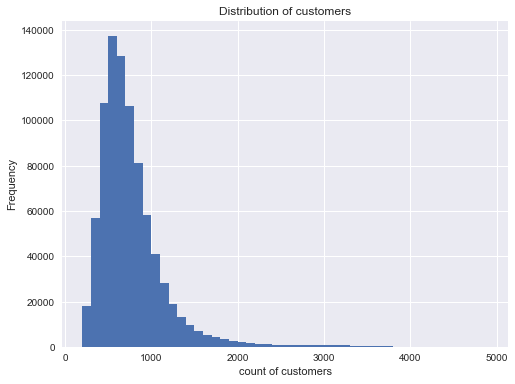

In [15]:
plt.figure(figsize=(8, 6))
bins = np.arange(200, 5000, 100)
final_df['Customers'].hist(bins=bins)
plt.xlabel('count of customers')
plt.ylabel('Frequency')
plt.title('Distribution of customers');


the highest frequency of customers is around 600

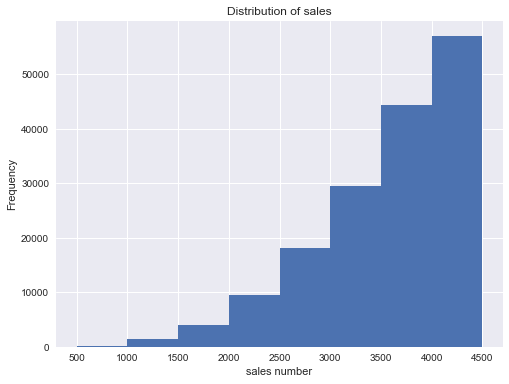

In [16]:
plt.figure(figsize=(8, 6))
bins = np.arange(500, 5000,500)
final_df['Sales'].hist(bins=bins)
plt.xlabel('sales number')
plt.ylabel('Frequency')
plt.title('Distribution of sales');

Observation:
    the sales with highest frequency is between 4000 and 4500

In [19]:
open_count = final_df['Open'].value_counts()
open_count

1    844392
0    172817
Name: Open, dtype: int64

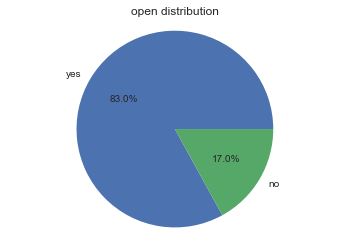

In [20]:
# pie plot of open
open_count= [844392,172817]
my_labels = 'yes','no'
plt.pie(open_count,labels=my_labels,autopct='%1.1f%%')
plt.title('open distribution')
plt.axis('equal')
plt.show();

observation:
the sales with open comprises of 83% of the whole sales while the no category made up just 17%

In [18]:
promo_count = final_df['Promo'].value_counts()
promo_count

0    629129
1    388080
Name: Promo, dtype: int64

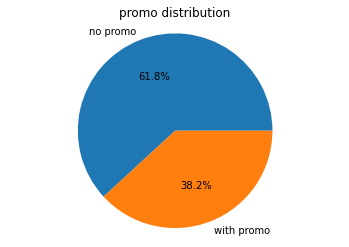

In [21]:
# pie plot of promo
promo_count= [629129,388080]
my_labels = 'no promo','with promo'
plt.pie(promo_count,labels=my_labels,autopct='%1.1f%%')
plt.title('promo distribution')
plt.axis('equal')
plt.show();

observation :
    majority of the customer of about 62% are without promotion 

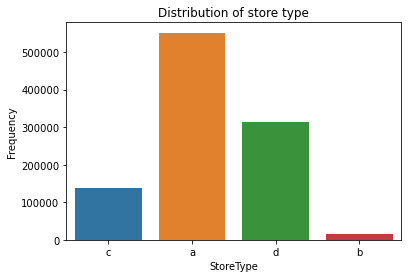

In [22]:
sns.countplot(data =final_df, x = 'StoreType')
plt.xlabel('StoreType')
plt.ylabel('Frequency')
plt.title('Distribution of store type');

observation: store 'A' has the highest sales while store 'B' has the lowest

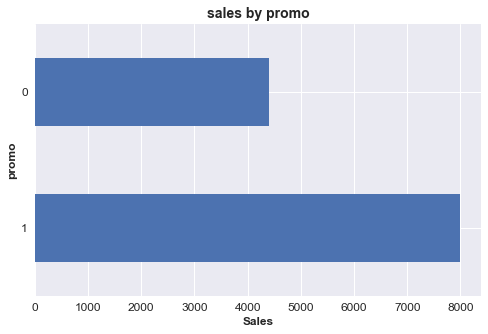

In [21]:
top3_sales_store = final_df.groupby('Promo')['Sales'].mean().sort_values(ascending=False).nlargest(3)

# plot a matplotlib barchart
plt.figure(figsize=(8,5))
top3_sales_store.plot(kind='barh',fontsize=12)
plt.xlabel('Sales', weight = 'bold', fontsize=12)
plt.ylabel('promo', weight = 'bold', fontsize=12)
plt.title("sales by promo",weight = 'bold', fontsize=14);

#### obversation: 
most of sales were made on promo

In [23]:
final_df['Date'] = pd.to_datetime(final_df["Date"],infer_datetime_format = True)
final_df['Year']= final_df["Date"].dt.year
final_df['Month']= final_df["Date"].dt.month
final_df['Day']= final_df["Date"].dt.day

In [24]:
final_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,2015,7,30


In [26]:
final_df.drop(["Date"], axis = 1, inplace =True)

In [27]:
# storetype on customer and sales
final_df.pivot_table(index="StoreType", values = ["Customers", "Sales"], aggfunc = "sum")

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


#### Observation
StoreType A has the highest number of both total customers and sales

In [28]:
# impact of promo on customers and sales
final_df.pivot_table(index="Promo", values = ["Sales", "Customers"], aggfunc = "sum")

,Customers,Sales
Promo,,
0,325777807,2771974337
1,318263948,3101206286


##### observation
It is observed that Promo has a huge impact on Sales but no impact on the customer


In [33]:
final_df['Year'].unique()

array([2015, 2014, 2013], dtype=int64)

In [30]:
final_df.pivot_table(index= ["Year", "Promo"], values = ["Sales", "Customers"], aggfunc = "sum")

Customers       Sales
Year Promo                       
2013 0      132503934  1117639183
     1      123500491  1185236901
2014 0      121234075  1023596760
     1      119254896  1157208136
2015 0       72039798   630738394
     1       75508561   758761249

#### Observation
From the table above it is observed that Promo has no effect in the year 2014 and 2015 but there is effect in the year 2015 on Customers While there was an huge impact of promo from the year 2013 to 2015 on Sales

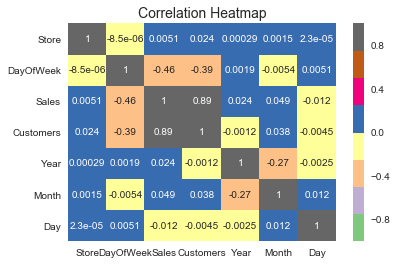

In [36]:
df_correlation  = final_df.corr()
sns.heatmap(df_correlation,vmin=-1.0,vmax=1.0,annot=True, cmap="Accent")
plt.title("Correlation Heatmap",fontsize=14)
plt.show()

observation:
    there is high  positive correlation between customers and sales
    there is low negative correlation with day of the week and custor and sales
    

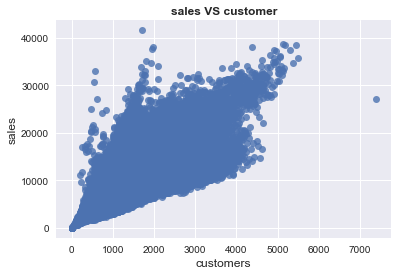

In [41]:
sns.regplot(x=final_df["Customers"], y=final_df["Sales"], fit_reg=False)
plt.xlabel('customers',fontsize=12)
plt.ylabel('sales',fontsize=12)
plt.title('sales VS customer',weight = 'bold');



observation:
    The scatterplot further butteress the fact that sales and customer is positely correlateD i.e the higher the customer the higher the sales and vice versa